**Imports**

In [1]:
# Imports:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


**Lengthy objects**

C:\Users\User\AppData\Local\Temp\ipykernel_5844\2837926357.py:42: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


0


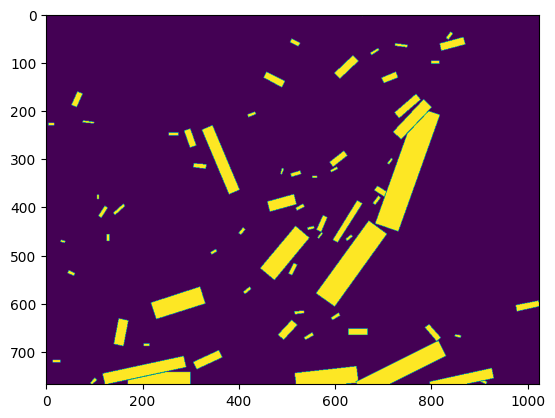

In [8]:
# Read in image:
path = "data/dacl10k_v2_devphase/images/train/"
file = "dacl10k_v2_train_0133.jpg"
image_path = path + file
image = cv2.imread(image_path, cv2.IMREAD_COLOR)
gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

def lengthy_image_filter(image, ratio = 2.5):
# Blur image:
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

    # Apply edge detector:
    edges = cv2.Canny(gray_image, 50, 150)

    # Apply morphological operations 
    kernel = np.ones((5, 5), np.uint8)
    edges = cv2.dilate(edges, kernel, iterations=1)
    edges = cv2.erode(edges, kernel, iterations=1)

    # Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    """
    ## Display contours
    image_contours = image.copy()
    plt.figure(figsize=(10, 10))
    cv2.drawContours(image_contours, contours, -1, (0, 255, 0), 2)
    plt.imshow(cv2.cvtColor(image_contours, cv2.COLOR_BGR2RGB))
    plt.show()

    # Extract characteristics per contour:
    image_boxes = image.copy()
    """
    stencil = np.zeros(gray_image.shape).astype(gray_image.dtype)
    color = [255]
    for contour in contours:

        # Get fitted bounding box
        rect = cv2.minAreaRect(contour)
        box = cv2.boxPoints(rect)
        box = np.int0(box)
        width = rect[1][0]
        height = rect[1][1]
        
        # Calculate aspect ratio
        aspect_ratio = float(max(width, height)) / min(width, height)
        if aspect_ratio > 2.5:
            cv2.drawContours(stencil, [box], 0, (0, 0, 255), 2)
            cv2.fillPoly(stencil, [box], color)

    return stencil
result = lengthy_image_filter(image, 2.5)
plt.imshow(result)
print(result[0,0])